In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_norm = pd.read_csv('Normal_Bearing.csv')
df_orf_2 = pd.read_csv('outer_race_fault_test_2.csv')
df_orf_3 = pd.read_csv('outer_race_fault_test_3.csv')
df_irf = pd.read_csv('inner_race_fault.csv')
df_ref = pd.read_csv('roller_element_fault.csv')

df = pd.concat([df_norm,df_orf_2,df_orf_3,df_irf,df_ref])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
0,0.5520,-0.5640,-0.117152,0.088715,0.146993,0.042514,0.975709,3.774804,-1.254731,Normal
1,0.4175,-0.6130,-0.117766,0.088628,0.147432,0.031653,1.020460,2.832186,-1.251913,Normal
2,0.4415,-0.5855,-0.117079,0.087172,0.146011,0.056889,0.932320,3.021907,-1.247192,Normal
3,0.4980,-0.6240,-0.116931,0.089763,0.147452,0.004492,1.038105,3.398210,-1.260966,Normal
4,0.4390,-0.5910,-0.117736,0.087695,0.146865,-0.011644,0.765244,2.981301,-1.247379,Normal
...,...,...,...,...,...,...,...,...,...,...
2273,0.6360,-0.8215,-0.114274,0.134403,0.176426,0.067830,1.292791,3.609385,-1.543961,Roller Element
2274,0.5945,-0.7825,-0.114281,0.131371,0.174157,0.033719,1.293530,3.412258,-1.524060,Roller Element
2275,0.6460,-0.8205,-0.113587,0.131056,0.173459,0.035932,1.335465,3.723053,-1.527302,Roller Element
2276,0.6920,-0.7790,-0.114356,0.132124,0.174755,0.052000,1.139499,3.966227,-1.528189,Roller Element


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor
0,0.5520,-0.5640,-0.117152,0.088715,0.146993,0.042514,0.975709,3.774804,-1.254731
1,0.4175,-0.6130,-0.117766,0.088628,0.147432,0.031653,1.020460,2.832186,-1.251913
2,0.4415,-0.5855,-0.117079,0.087172,0.146011,0.056889,0.932320,3.021907,-1.247192
3,0.4980,-0.6240,-0.116931,0.089763,0.147452,0.004492,1.038105,3.398210,-1.260966
4,0.4390,-0.5910,-0.117736,0.087695,0.146865,-0.011644,0.765244,2.981301,-1.247379
...,...,...,...,...,...,...,...,...,...
2273,0.6360,-0.8215,-0.114274,0.134403,0.176426,0.067830,1.292791,3.609385,-1.543961
2274,0.5945,-0.7825,-0.114281,0.131371,0.174157,0.033719,1.293530,3.412258,-1.524060
2275,0.6460,-0.8205,-0.113587,0.131056,0.173459,0.035932,1.335465,3.723053,-1.527302
2276,0.6920,-0.7790,-0.114356,0.132124,0.174755,0.052000,1.139499,3.966227,-1.528189


In [5]:
y

0               Normal
1               Normal
2               Normal
3               Normal
4               Normal
             ...      
2273    Roller Element
2274    Roller Element
2275    Roller Element
2276    Roller Element
2277    Roller Element
Name: Fault, Length: 2278, dtype: object

# PCA - 2 components

In [6]:
X = StandardScaler().fit_transform(X)

pca_comp_2 = PCA(n_components=2)
X_pca = pca_comp_2.fit_transform(X)

princiDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

princiDf['Fault']=np.array(df['Fault'])

In [7]:
princiDf

,principal component 1,principal component 2,Fault
0,-0.429293,-0.266926,Normal
1,-0.651440,0.007648,Normal
2,-0.669828,-0.122940,Normal
3,-0.451062,-0.061701,Normal
4,-0.629091,0.075495,Normal
...,...,...,...
2273,0.373373,0.384994,Roller Element
2274,0.255363,0.473315,Roller Element
2275,0.376833,0.375642,Roller Element
2276,0.418730,0.299692,Roller Element


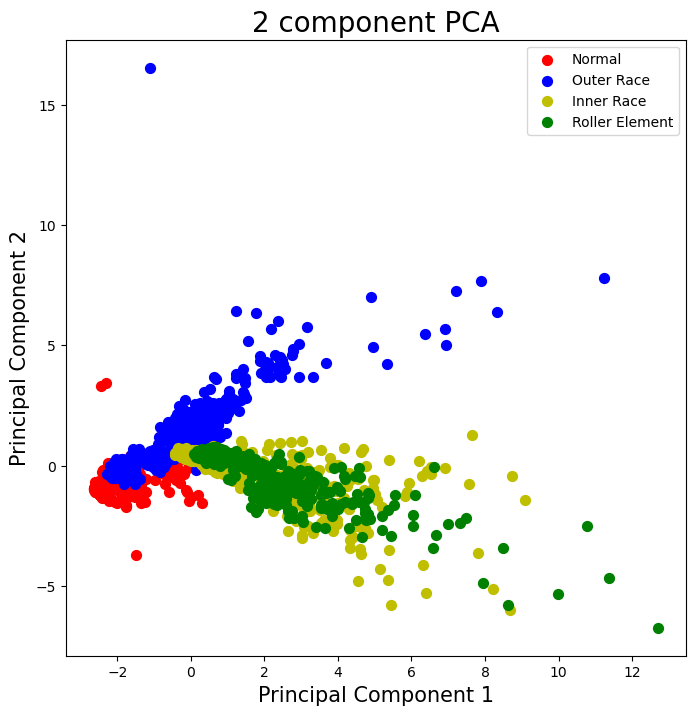

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['r', 'b','y','g']
for fault, color in zip(fault,colors):
    indicesToKeep = princiDf['Fault'] == fault
    ax.scatter(princiDf.loc[indicesToKeep, 'principal component 1']
               , princiDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

In [9]:
# sum(pca_comp_2.explained_variance_ratio_)
pca_comp_2.explained_variance_ratio_

array([0.48789202, 0.18686289])

In [10]:
X = StandardScaler().fit_transform(X)

pca_comp_3 = PCA(n_components=3)

X_pca = pca_comp_3.fit_transform(X)

princiDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

princiDf['Fault']=np.array(df['Fault'])

In [11]:
princiDf

,principal component 1,principal component 2,principal component 3,Fault
0,-0.429293,-0.266926,-1.317452,Normal
1,-0.651440,0.007648,-1.580008,Normal
2,-0.669828,-0.122940,-1.521485,Normal
3,-0.451062,-0.061701,-1.416302,Normal
4,-0.629091,0.075495,-1.547624,Normal
...,...,...,...,...
2273,0.373373,0.384994,-1.354334,Roller Element
2274,0.255363,0.473315,-1.405808,Roller Element
2275,0.376833,0.375642,-1.308114,Roller Element
2276,0.418730,0.299692,-1.257559,Roller Element


In [12]:
%matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = princiDf['Fault'] == fault
    ax.scatter3D(princiDf.loc[indicesToKeep, 'principal component 1']
               , princiDf.loc[indicesToKeep, 'principal component 2']
               , princiDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  

plt.show()

In [15]:
 sum(pca_comp_3.explained_variance_ratio_)
# pca_comp_3.explained_variance_ratio_

0.8221768558209331